# Лабораторная работа 9. ООП.

In [1]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

# 1. Инкапсуляция
Под инкапсуляцией в объектно-ориентированном программировании понимается упаковка данных и методов для их обработки вместе, т. е. в классе. В Python инкапсуляция реализуется как на уровне классов, так и объектов. В ряде других языков, например в Java, под инкапсуляцией также понимают сокрытие свойств и методов, в результате чего они становятся приватными. Это значит, что доступ к ним ограничен либо пределами класса, либо модуля.

В Python подобной инкапсуляции нет, хотя существует способ ее имитировать. Перед тем как выяснять, как это делается, надо понять, зачем вообще что-то скрывать.

Дело в том, что классы бывают большими и сложными. В них может быть множество вспомогательных полей и методов, которые не должны использоваться за его пределами. Они просто для этого не предназначены. Они своего рода внутренние шестеренки, обеспечивающие нормальную работу класса.

Кроме того, в других языках программирования хорошей практикой считается сокрытие всех полей объектов, чтобы уберечь их от прямого присвоения значений из основной ветки программы. Их значения можно изменять и получать только через вызовы методов, специально определенных для этих целей.

Например, если надо проверять присваиваемое полю значение на корректность, то делать это каждый раз в основном коде программы будет неправильным. Проверочный код должен быть помещен в метод, который получает данные, для присвоения полю. А само поле должно быть закрыто для доступа из вне класса. В этом случае ему невозможно будет присвоить недопустимое значение.

Часто намеренно скрываются поля самого класса, а не его объектов. Например, если класс имеет счетчик своих объектов, то необходимо исключить возможность его случайного изменения из вне. Рассмотрим пример с таким счетчиком на языке Python.

In [2]:
class B:
    count = 0
    def __init__(self):
        B.count += 1
    def __del__(self):
        B.count -= 1

In [3]:
a = B()
b = B()
с = B()
print(b.count)
print(B.count) 
del a
print(B.count) 

3
3
2


In [4]:
b.count

2

In [5]:
B.count -= 1
print(B.count)

1


# 2. Полиморфизм
Полиморфизм в объектно-ориентированном программировании – это возможность обработки разных типов данных, т. е. принадлежащих к разным классам, с помощью "одно и той же" функции, или метода. На самом деле одинаковым является только имя метода, его исходный код зависит от класса. Кроме того, результаты работы одноименных методов могут существенно различаться. Поэтому в данном контексте под полиморфизмом понимается множество форм одного и того же слова – имени метода.

Например, два разных класса содержат метод total, однако инструкции каждого предусматривают совершенно разные операции. Так в классе T1 – это прибавление 10 к аргументу, в T2 – подсчет длины строки символов. В зависимости от того, к объекту какого класса применяется метод total, выполняются те или иные инструкции.

In [8]:
class T1:
     n=10
     def total(self, N):
          self.total = int(self.n) + int(N)
 
class T2:
     def total(self,s):
          self.total = len(str(s))

In [9]:
t1 = T1()
t2 = T2()
t1.total(45)
t2.total(45)
print(t1.total) 
print(t2.total) 

55
2


Как видно полиморфизмом обладают классы связанные наследованием. У каждого может быть свой метод __init__() или square() или какой-нибудь другой. Какой именно из методов square() вызывается, и что он делает, зависит от принадлежности объекта к тому или иному классу.

Однако классы не обязательно должны быть связанны наследованием. Полиморфизм как один из ключевых элементов ООП существует независимо от наследования. Классы могут быть не родственными, но иметь одинаковые методы.

Полиморфизм дает возможность реализовывать так называемые единые интерфейсы для объектов различных классов. Например, разные классы могут предусматривать различный способ вывода той или иной информации объектов. Однако одинаковое название метода вывода позволит не запутать программу, сделать код более ясным.

Рассмотрим пример полиморфизма на еще одном методе, который перегружает функцию print().

Если вы создадите объект собственного класса, а потом попробуете вывести его на экран, то получите информацию о классе объекта и его адрес в памяти. Такое поведение функции print() по-умолчанию по отношению к пользовательским классам запрограммировано на самом верхнем уровне иерархии, где-то в суперклассе, от которого неявно наследуются все остальные.

In [10]:
class A:
    def __init__(self, v1, v2):
        self.field1 = v1
        self.field2 = v2

In [11]:
a = A(3, 4)
print(a)

Если же мы хотим, чтобы, когда объект передается функции print(), выводилась какая-нибудь другая более полезная информация, то в класс надо добавить специальный метод __str__(). Этот метод должен обязательно возвращать строку, которую будет выводить функция print():

In [12]:
class A:
    def __init__(self, v1, v2):
        self.field1 = v1
        self.field2 = v2
    def __str__(self):
        return str(self.field1) + " " + str(self.field2)

In [13]:
a = A(3, 4)
print(a)

3 4


# Упражнение №1

Измените класс A таким образом, что объект этого класса может содержать произвольное число параметров. Пергрузите для него функции $__bool__()$ и $__len__()$.

# 3. Наследование
Наследование – важная составляющая объектно-ориентированного программирования. Так или иначе мы уже сталкивались с ним, ведь объекты наследуют атрибуты своих классов. Однако обычно под наследованием в ООП понимается наличие классов и подклассов. Также их называют супер- или надклассами и классами, а также родительскими и дочерними классами.

Суть наследования здесь схожа с наследованием объектами от классов. Дочерние классы наследуют атрибуты родительских, а также могут переопредять атрибуты и добавлять свои.

# 3.1. Простое наследование

In [14]:
class Table:
    def __init__(self, l, w, h):
        self.lenght = l
        self.width = w
        self.height = h
 
class KitchenTable(Table):
    def setPlaces(self, p):
        self.places = p
 
class DeskTable(Table):
    def square(self):
        return self.width * self.lenght

В данном случае классы KitchenTable и DeskTable не имеют своих собственных конструкторов, поэтому наследуют его от родительского класса. При создании экземпляров этих столов, передавать аргументы для __init__() обязательно, иначе возникнет ошибка:

In [15]:
t1 = KitchenTable()

TypeError: __init__() missing 3 required positional arguments: 'l', 'w', and 'h'

In [16]:
t1 = KitchenTable(2, 2, 0.7)
t2 = DeskTable(1.5, 0.8, 0.75)
t3 = KitchenTable(1, 1.2, 0.8)

In [17]:
t3.lenght

1

Несомненно можно создавать столы и от родительского класса Table. Однако он не будет, согласно неким родственным связям, иметь доступ к методам setPlaces() и square(). Точно также как объект класса KitchenTable не имеет доступа к единоличным атрибутам сестринского класса DeskTable

In [18]:
t4 = Table(1, 1, 0.5)

In [19]:
t2.width * t2.lenght

1.2000000000000002

In [20]:
t2.square()

1.2000000000000002

In [21]:
t4.square()

AttributeError: 'Table' object has no attribute 'square'

In [22]:
t3.square()

AttributeError: 'KitchenTable' object has no attribute 'square'

# 3.2. Полное переопределение метода надкласса
Что если в подклассе нам не подходит код метода его надкласса. Допустим, мы вводим еще один класс столов, который является дочерним по отношению к DeskTable. Пусть это будут компьютерные столы, при вычислении рабочей поверхности которых надо отнимать заданную величину. Имеет смысл внести в этот новый подкласс его собственный метод square():

In [23]:
class ComputerTable(DeskTable):
    def square(self, e):
        return self.width * self.lenght - e

При создании объекта типа ComputerTable по-прежнему требуется указывать параметры, так как интерпретатор в поисках конструктора пойдет по дереву наследования сначала в родителя, а потом в прародителя и найдет там метод __init__().

Однако когда будет вызываться метод square(), то поскольку он будет обнаружен в самом ComputerTable, то метод square() из DeskTable останется невидимым, т. е. для объектов класса ComputerTable он окажется переопределенным.

In [24]:
ct = ComputerTable(2, 1, 1)
ct.square(0.3)

1.7

ИЛИ

In [25]:
class ComputerTable(DeskTable):
    def square(self, e):
        return DeskTable.square(self) - e 

In [26]:
ct = ComputerTable(2, 1, 1)
ct.square(0.3)

1.7

Допустим, в классе KitchenTable нам не нужен метод, поле places должно устанавливаться при создании объекта в конструкторе. В классе можно создать собсвенный конструктор с чистого листа, чем переопределить родительский:

In [27]:
class KitchenTable(Table):
    def __init__(self, l, w, h, p):
        self.length = l
        self.width = w
        self.height = h
        self.places = p

Однако, если дублируется почти весь конструктор надкласса, проще вызвать родительский конструктор, после чего дополнить своим кодом:

In [28]:
class KitchenTable(Table):
    def __init__(self, l, w, h, p):
        Table.__init__(self, l, w, h)
        self.places = p

In [29]:
tk = KitchenTable(2, 1.5, 0.7, 10)

In [30]:
tk.places

10

In [31]:
tk.width 

1.5

# 3.3. Множественное наследование

Для наследования от нескольких классав в определении класса-наследника достаточно указать в круглых скобках сразу несколько базовых классов через запятую.

# Пример.

Рассмотрим три класса:

In [6]:
class Classl: 
    def funс1(self):
        print("Метод funс1() класса Classl")

class Class2(Classl): # Простое наследование
    def func2(self):
        print("Метод func2() класса Class2")

class Class3(Classl): # Простое наследование
    def funс1(self):
        print("Метод funс1() класса Class3")
    def func2(self):
        print("Метод func2() класса Class3")
    def func3(self):
        print("Метод func3() класса Class3")
    def func4(self):
        print("Метод func4() класса Class3")

class Class4(Class2, Class3): # Множественное наследование
    def func4(self):
        print("Метод func4() класса Class4")

In [8]:
c = Class4()
c.funс1() 
c.func2() 
c.func3() 
c.func4() 

Метод funс1() класса Class3
Метод func2() класса Class2
Метод func3() класса Class3
Метод func4() класса Class4


Метод func1() определен в двух классах: class1 и ciass3. Так как вначале просматриваются все базовые классы, непосредственно указанные в определении текущего класса, метод func1() будет найден в классе class3 (поскольку он указан в числе базовых классов в определении Class4), а не в классе Class1.

Метод func2() также определен в двух классах: Class2 и Class3. Так как класс Class2 стоит первым в списке базовых классов, то метод будет найден именно в нем. 

Чтобы наследовать метод из класса Class3, следует указать это явным образом:

In [9]:
class Class4(Class2, Class3): # Множественное наследование
# Наследуем func2() из класса Class3, а не из класса Class2
    func2 = Class3.func2
    def func4(self):
        print("Метод func4() класса Class4")

In [10]:
c = Class4()
c.funс1() 
c.func2() 
c.func3() 
c.func4() 

Метод funс1() класса Class3
Метод func2() класса Class3
Метод func3() класса Class3
Метод func4() класса Class4


# Упражнение №2

Напишите класс "numbers" содержащий два атрибута x и y, функцию инициализации и функции Operation и Run:

In [50]:
def Operation(self):
    return self.x + self.y
def Run(self):
    z = self.Operation()
    print("Результат операции равен " + z.__str__())

Создайте класс наследник, и с помощью полиморфизма замените функцию Operation на любую другую в наследном классе.

# 4. Композиция

Еще одной особенностью объектно-ориентированного программирования является возможность реализовывать так называемый композиционный подход. Заключается он в том, что есть класс-контейнер, он же агрегатор, который включает в себя вызовы других классов. В результате чего, что при создании объекта класса-контейнера, также создаются объекты включенных в него классов.

Не следует путать композицию с наследованием, в том числе множественным. Наследование предполагает принадлежность к какой-то общности (похожесть), а композиция — формирование целого из частей. Наследуются атрибуты, т.е. возможности, другого класса, при этом объектов непосредственно родительского класса не создается. При композиции же класс-агрегатор создает объекты других классов.

Рассмотрим на примере реализацию композиции в Python. Пусть, требуется написать программу, которая вычисляет площадь стен. При этом окна, двери, пол и потолок должны быть исключены.

И так, комната – это прямоугольный параллелепипед, состоящий из шести прямоугольников. Его площадь представляет собой сумму площадей составляющих его прямоугольников. Площадь прямоугольника равна произведению его длины на ширину.

In [32]:
class WinDoor:
     def __init__(self, x, y):
          self.square = x * y 

In [33]:
class Room:
    def __init__(self, x, y, z):
        self.square = 2 * z * (x + y)
        self.wd = []
    def addWD(self, w, h):
        self.wd.append(WinDoor(w, h))
    def workSurface(self):
        new_square = self.square
        for i in self.wd:
            new_square -= i.square
        return new_square

In [34]:
r1 = Room(6, 3, 2.7) 
print(r1.square)
r1.addWD(1, 1) 
r1.addWD(1, 1)
r1.addWD(1, 2)
print(r1.workSurface())

48.6
44.6


# Упражнение №3

Дополните приведённый пример возможностью вычисления площади пола и потолка, приэтом в полу может быть квадратный проём с лестницей ведущей вниз, а на птолке круглые слуховые окна.

# Домашнее задание (базовое):

# Задание №1. 

Создайте класс "Геометрические фигуры" атрибутами котрого будут: параметры периметр, площадь и координаты некотрой характерной точки или точек (например, центра или вершин). Создайте три класса потомка: треугольник, прямоугольник, круг. Для классов потомков определить функцию инициализации $__init__$ и функции для вычисления периметра и площади, функцию paint выводящую рисунок соответствующей геометрической фигуры с помощью библиотеки matplotlib.

Стороны треугольника: (7.0710678118654755, 6.4031242374328485, 3.605551275463989)
Периметр: 17.079743324762312
Площадь: 11.5


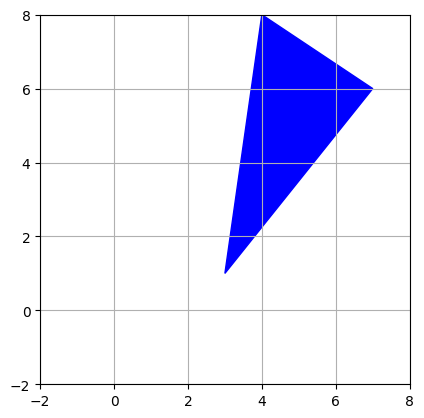

In [11]:
import matplotlib.pyplot as plt
import pylab
class figure:
    def __init__(self, P, S, **dots):
        self.P = P
        self.S = S
        self.__dict__.update(dots)
class triangle(figure):
    def __init__(self, **dots):
        super().__init__(self.p(dots['dot1'], dots['dot2'], dots['dot3']), 
                         self.s(dots['dot1'], dots['dot2'], dots['dot3']), 
                         dot1 = dots['dot1'], dot2 = dots['dot2'], dot3 = dots['dot3'])
        
    def side(self, dot1, dot2, dot3):
        l1 = ((dot1[0]-dot2[0])**2+(dot1[1]-dot2[1])**2)**0.5
        l2 = ((dot2[0]-dot3[0])**2+(dot2[1]-dot3[1])**2)**0.5
        l3 = ((dot3[0]-dot1[0])**2+(dot3[1]-dot1[1])**2)**0.5
        return l1, l2, l3
    
    def p(self, dot1, dot2, dot3):
        l1, l2, l3 = self.side(dot1, dot2, dot3)
        P = l1 + l2 + l3
        return P
    
    def s(self, dot1, dot2, dot3):
        S = 0.5 * abs((dot2[0] - dot1[0] ) * (dot3[1] - dot1[1]) 
                      - (dot3[0] - dot1[0] ) * (dot2[1] - dot1[1]))
        return S
    
    def paint(self):
        plt.xlim(-2, 8)
        plt.ylim(-2, 8)
        plt.grid()
        axes = plt.gca()  
        axes.set_aspect("equal")
        axes.add_patch(plt.Polygon([[self.dot1[0], self.dot1[1]],
                                    [self.dot2[0], self.dot2[1]],
                                    [self.dot3[0], self.dot3[1]]],
                                   fill = True,
                                   closed = True,
                                   color= 'blue'))
        plt.show()
TRNGL = triangle(dot1 = [4, 8], dot2 = [3, 1], dot3 = [7, 6])
print('Стороны треугольника:', TRNGL.side(TRNGL.dot1, TRNGL.dot2, TRNGL.dot3))
print('Периметр:', TRNGL.P)
print('Площадь:', TRNGL.S)
TRNGL.paint()

Стороны прямоугольника: (2.23606797749979, 4.123105625617661)
Периметр: 12.7183472062349
Площадь: 9.219544457292887


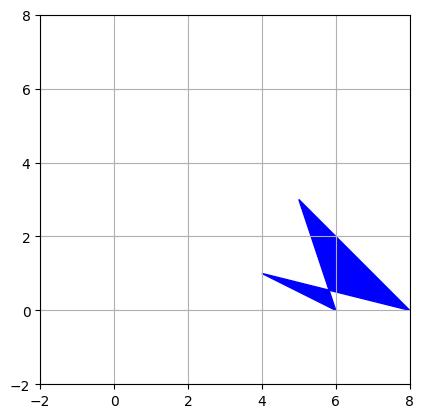

In [13]:
class rectangle(figure):
    def __init__(self, **dots):
        super().__init__(self.p(dots['dot1'], dots['dot2'], dots['dot3']), 
                         self.s(dots['dot1'], dots['dot2'], dots['dot3']), 
                         dot1 = dots['dot1'], 
                         dot2 = dots['dot2'], 
                         dot3 = dots['dot3'], 
                         dot4 = dots['dot4'])
        
    def side(self, dot1, dot2, dot3):
        l1 = ((dot1[0]-dot2[0])**2+(dot1[1]-dot2[1])**2)**0.5
        l2 = ((dot3[0]-dot1[0])**2+(dot3[1]-dot1[1])**2)**0.5
        return l1, l2
    
    def p(self, dot1, dot2, dot3):
        l1, l2 = self.side(dot1, dot2, dot3)
        P = 2*(l1 + l2)
        return P
    
    def s(self, dot1, dot2, dot3):
        l1, l2 = self.side(dot1, dot2, dot3)
        S = l1*l2
        return S
    
    def paint(self):
        plt.xlim(-2, 8)
        plt.ylim(-2, 8)
        plt.grid()
        axes = plt.gca()
        axes.set_aspect("equal")
        axes.add_patch(plt.Polygon([[self.dot1[0], self.dot1[1]],
                                    [self.dot2[0], self.dot2[1]],
                                    [self.dot4[0], self.dot4[1]],
                                    [self.dot3[0], self.dot3[1]]],
                                   fill = True,
                                   closed = True,
                                   color= 'blue'))
        
        plt.show()
RECT = rectangle(dot1 = [4, 1], dot2 = [, 0], dot3 = [8, 0], dot4 = [5, 3])
print('Стороны прямоугольника:', RECT.side(RECT.dot1, RECT.dot2, RECT.dot3))
print('Периметр:', RECT.P)
print('Площадь:', RECT.S)
RECT.paint()

5.0
5.0
31.400000000000002
78.5


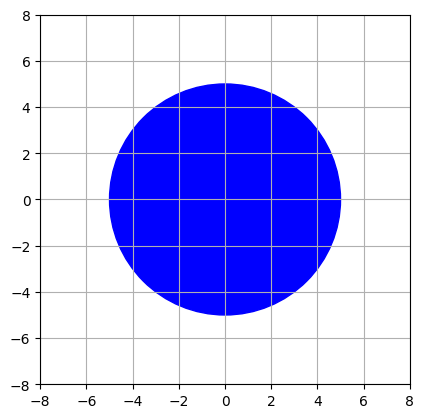

In [15]:
class circle(figure):
    def __init__(self, **dots):
        super().__init__(self.p(dots['dot1'], dots['dot2']), 
                         self.s(dots['dot1'], dots['dot2']),
                         dot1 = dots['dot1'], 
                         dot2 = dots['dot2'])
        
    def r(self, dot1, dot2):
        rr = ((dot1[0]-dot2[0])**2+(dot1[1]-dot2[1])**2)**0.5
        return rr
    
    def p(self, dot1, dot2):
        rr = self.r(dot1, dot2)
        print(rr)
        P = 3.14 * rr * 2
        return P
    
    def s(self, dot1, dot2):
        rr = self.r(dot1, dot2)
        S = rr**2 * 3.14
        return S
    
    def paint(self):
        plt.xlim(-8, 8)
        plt.ylim(-8, 8)
        plt.grid()
        axes = plt.gca()
        axes.set_aspect("equal")
        axes.add_patch(plt.Circle((0, 0),
                       radius= self.r(self.dot1, self.dot2),
                       color= 'blue'))
        plt.show()
CRCL = circle(dot1 = [0, 0], dot2 = [0, 5])
print(CRCL.r(CRCL.dot1, CRCL.dot2))
print(CRCL.P)
print(CRCL.S)
CRCL.paint()

# Задание №2. 

Реализуйте класс Matrix. Он должен содержать:

- Конструктор от списка списков. Гарантируется, что списки состоят из чисел, не пусты и все имеют одинаковый размер. Конструктор должен копировать содержимое списка списков, т.е. при изменении списков, от которых была сконструирована матрица, содержимое матрицы изменяться не должно.
- Метод $__str__$, переводящий матрицу в строку. При этом элементы внутри одной строки должны быть разделены знаками табуляции, а строки — переносами строк. После каждой строки не должно быть символа табуляции и в конце не должно быть переноса строки.
- Метод size без аргументов, возвращающий кортеж вида (число строк, число столбцов). 
- $__add__$, принимающий вторую матрицу того же размера и возвращающий сумму матриц. В случае, если две матрицы сложить невозможно, должно выводиться сообщение об ошибке.
- $__mul__$, таким образом, чтобы матрицы можно было умножать на скаляры и на другие матрицы. В случае, если две матрицы перемножить невозможно, должно выводиться сообщение об ошибке.
- $__rmul__$, делающий то же самое, что и $__mul__$. Этот метод будет вызван в том случае, аргумент находится справа. Для реализации этого метода в коде класса достаточно написать $__rmul__$ = $__mul__$.
- Реализуйте статический метод transposed, принимающий Matrix и возвращающий транспонированную матрицу.

In [2]:
import numpy as np
class Matrix:
    def __init__(self, matrix):
        self.matrix = np.array(matrix)

    def __str__(self):
        S = ''
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[0])):
                S += str(self.matrix[i][j]) + '\t'
            S = S[:-1]
            S += '\n'
        return S[:-1]
    
    def size(self):
        return (len(self.matrix), len(self.matrix[0]))
    
    def __add__(self1, self2):
        if self1.size() != self2.size():
            raise ValueError("Размеры не совпадают")
            return None
        else:
            return Matrix(self1.matrix + self2.matrix)
        
    def __mul__(self1, self2):
        if type(self1) is int:
            return Matrix(self1 * self2.matrix)
        elif type(self2) is int:
            return Matrix(self2 * self1.matrix)
        elif len(self1.matrix[0]) != len(self2.matrix):
            raise ValueError("Матрицы нельзя умножить")
            return None
        else:
            return Matrix(np.dot(self1.matrix, self2.matrix))
    
    __rmul__ = __mul__
    
    def transposed(self):
        M = Matrix([])
        M.matrix = np.transpose(self.matrix)
        return M
m = Matrix( [ [0, 1, 2], [3, 4, 5], [6, 7, 8] ] )
n = Matrix( [ [1, 5, 9] ] )
print('Сумма двух одинаковых матриц m равна\n' + str(m + m))
print('Произведение матриц n и m равно\n' + str(n * m))
print('Матрица m - это\n' + str(m) + '\nа транспонированная ей - \n' + str(Matrix.transposed(m)))
print('Произведение матрицы m на число 2 равно\n' + str(2 * m))

Сумма двух одинаковых матриц m равна
0	2	4
6	8	10
12	14	16
Произведение матриц n и m равно
69	84	99
Матрица m - это
0	1	2
3	4	5
6	7	8
а транспонированная ей - 
0	3	6
1	4	7
2	5	8
Произведение матрицы m на число 2 равно
0	2	4
6	8	10
12	14	16


# Задание №3



Создайте класс Vector наследующий все атрибуты класса Matrix, методы реализованные в классе из задания 3 предыдущей лабораторной и обладающим методом векторного произведения векторов.

In [20]:
class Vector(Matrix):
    def __init__(self, dot1, dot2):
        self.begin = dot1
        self.end = dot2
        super().__init__([[ self.end[a] - self.begin[a] for a in range(len(self.begin)) ]])
        
    def __add__(self1, self2):
        m = super().__add__(self1, self2)
        if m == None:
            return None
        return Vector([ self1.begin[a] for a in range(len(self1.begin)) ], m.matrix)
    
    def __sub__(self1, self2):
        return Vector([ self1.begin[a] for a in range(len(self1.begin)) ], 
                      [[ (self1.end[a] - self2.matrix[a]) for a in range(len(self1.matrix)) ]])
    
    def __mul__(self1, self2):
        if type(self1) is not int and type(self2) is not int:
            self2t = self2.transposed()
        m = Matrix.__mul__(self1, self2t)
        if m.matrix.shape == (1, 1):
            return m.matrix[0][0]
        return m.matrix
    
    __rmul__ = __mul__
    
    def getLength(self):
        l2 = 0
        for a in range(len(self.matrix[0])):
            l2 += (self.matrix[0][a]) ** 2
        l = l2 ** 0.5
        return l
    
    def getCos(self1, self2):
        return self1 * self2 / (self1.getLength() * self2.getLength())
    
    def about(self):
        print('Вектор №%i:' % id(self))
        print('\tКоординаты вектора:', self.matrix)
        print('\tКоординаты начальной точки:', self.begin)
        print('\tКоординаты конечной точки:', self.end)
        print('\tДлина вектора:', self.getLength())
    
    def getVectMul(self1, self2):
        if not 2 <= len(self1.matrix[0]) <= 3:
            return Vector([0, 0, 0], [0, 0, 0])
        else:
            return Vector([0, 0, 0], np.cross(self1.matrix.reshape(-1), self2.matrix.reshape(-1)))
b = Vector([1, 2, 3, 4, 5], [0, -1, -2, -3, -4])
b.about()

Вектор №2317749267216:
	Координаты вектора: [[-1 -3 -5 -7 -9]]
	Координаты начальной точки: [1, 2, 3, 4, 5]
	Координаты конечной точки: [0, -1, -2, -3, -4]
	Длина вектора: 12.84523257866513


# Домашнее задание (дополнительное):

# Геометрические фигуры.

Измените классы из 1 задания следующим образом. 

Создайте класс "Параметры" состаящий из двух атрибутов: значения и описания этого параметра (т.е. строки). Сделайте каждый параметр созданных в задании 1 классов объектом класса "Параметры". 

Создайте библиотеку функций для вычисления площадей и периметров двумя способами:

- соберите функции в класс и объявите их как статические (для вычисления параметров фигур вызывайте функции из этого класса);

- соберите функции в класс с помощью композиции (т.е. создавая внутри этого класса объекты соответствующих геометрических фигур и проводя соответствующие вычисления).